In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Import Plotly Express
from matplotlib.colors import ListedColormap

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\harsh\AppData\Local\Temp\ipykernel_12252\1453474779.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\harsh\anaconda3\

In [2]:
dataframe=pd.read_csv('heart.csv')
dataframe['sex'].replace(['Male', 'Female'],[0, 1], inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_12252\3179853534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['sex'].replace(['Male', 'Female'],[0, 1], inplace=True)


In [3]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataframe.shape

(1025, 14)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
dataframe.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dataframe.isnull().sum().sum()

0

In [8]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

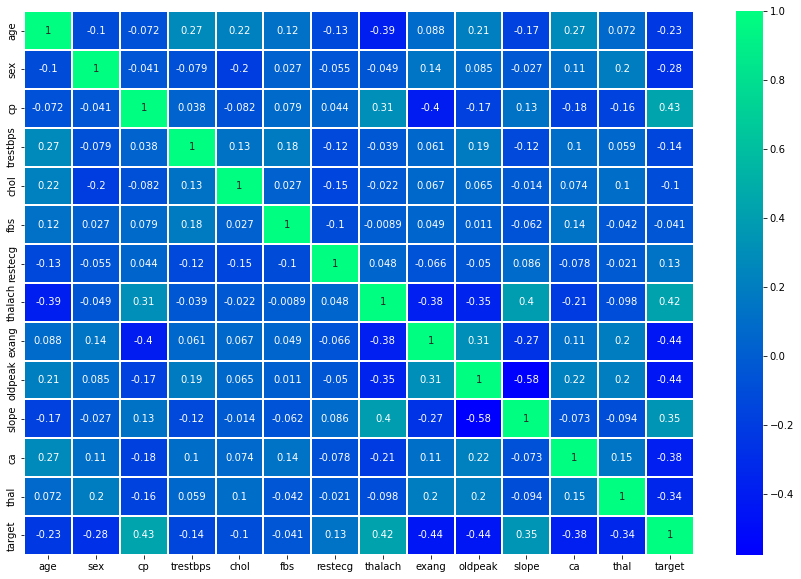

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

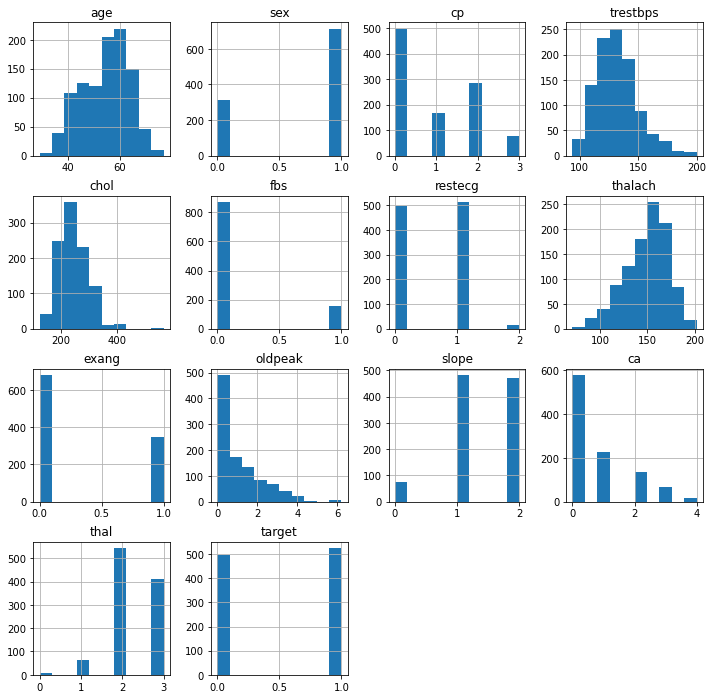

In [11]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [18]:
X = dataframe.drop(columns=['target'])
y = dataframe['target']
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=40)

## 1 .Logistic Regression

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing Accuracy for Logistic Regression: 0.8287937743190662


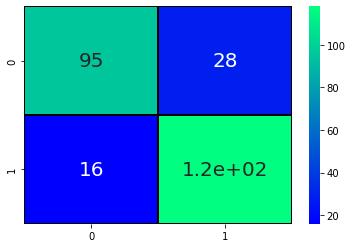

In [19]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))

## 2. Decision Tree

Testing Accuracy for Decision Tree: 0.914396887159533


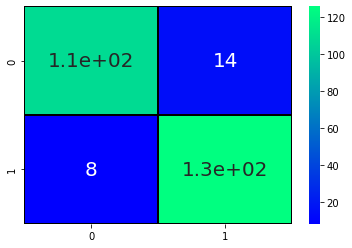

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
# print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))

## 3. Random Forest Classifier

Testing Accuracy for Random Forest: 0.9922178988326849


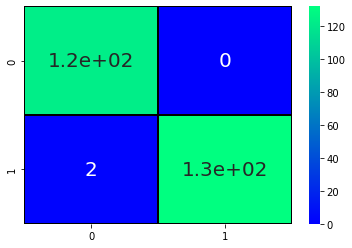

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
# print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))

## 4. Support Vector Machines(SVM)

Testing Accuracy for SVM: 0.8132295719844358


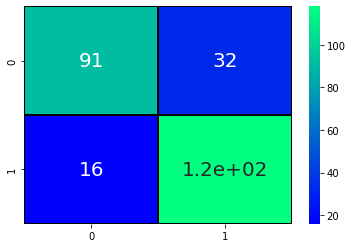

In [25]:
  from sklearn.svm import SVC
  svm=SVC(C=12,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]
  
  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))

From the results that we got, as four machine learning algorithms like Logistic Regression, Random Forest, Support Vector Machines and Decision Trees. From the final results, we got Logistic Regression as 82%, Random Forest as 99%, Support Vector Machines as 81%, and Decision Trees as 91%. We can conclude that the Random Forest algorithm is the best algorithm for our model with the highest accuracy around 99 percent.

## Final Model Implementation